# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [2]:
!wget https://storage.yandexcloud.net/mle-data/goodsread/books.parquet

!wget https://storage.yandexcloud.net/mle-data/goodsread/interactions.parquet

--2025-06-18 21:32:29--  https://storage.yandexcloud.net/mle-data/goodsread/books.parquet
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33930590 (32M) [application/x-www-form-urlencoded]
Saving to: ‘books.parquet’

books.parquet       100%[===================>]  32.36M   135MB/s    in 0.2s    

2025-06-18 21:32:29 (135 MB/s) - ‘books.parquet’ saved [33930590/33930590]

--2025-06-18 21:32:29--  https://storage.yandexcloud.net/mle-data/goodsread/interactions.parquet
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150956253 (144M) [application/x-www-form-urlencoded]
Saving to: ‘interactions.par

In [4]:
books = pd.read_parquet("books.parquet")

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [6]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [8]:
interactions = pd.read_parquet("interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [9]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [10]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


In [ ]:
interactions

In [21]:
print('количество пользователей', interactions['user_id'].nunique())
print('среднее количество прочитанных книг на пользователя',round(interactions.groupby('user_id')['is_read'].sum().mean(), 0))  
print('доля прочитанных книг, у которых нет рейтинга',round(interactions.query('is_read == 1 and rating == 0')['is_read'].count() / interactions['is_read'].count(), 2))


количество пользователей 542657
среднее количество прочитанных книг на пользователя 24.0
доля прочитанных книг, у которых нет рейтинга 0.08


In [22]:
interactions['rating'].value_counts(normalize=True)

rating
4    0.353707
5    0.299434
3    0.198956
0    0.081585
2    0.052061
1    0.014256
Name: proportion, dtype: float64

# EDA

Посмотрим на данные о книгах, какие поля есть.

In [11]:
books.sample(3).T

,2060927,1423029,988996
book_id,13338887,12560661,2939815
author,Suzy Zail,H.M. Ward,أنيس منصور
title,The Wrong Boy,"Satan's Stone (Demon Kissed, #4)",أرواح وأشباح
description,The story of a Jewish girl sent to Auschwitz w...,A single stone can heal the Sapphire Serum tha...,m ldhy yj`l lnsn qdr `ly 'n yqr' 'fkrk ... m l...
genre_and_votes,"{'Historical-Historical Fiction': 112, 'Young ...","{'Fantasy-Paranormal': 18, 'Young Adult': 16, ...",{'Nonfiction': 11}
num_pages,256,268,301
average_rating,4.1,4.16,3.54
ratings_count,792,982,4392
text_reviews_count,107,44,245
publisher,Black Dog Books,Laree Bailey Press,dr lshrwq


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [10]:
books["book_id"].nunique()

43312

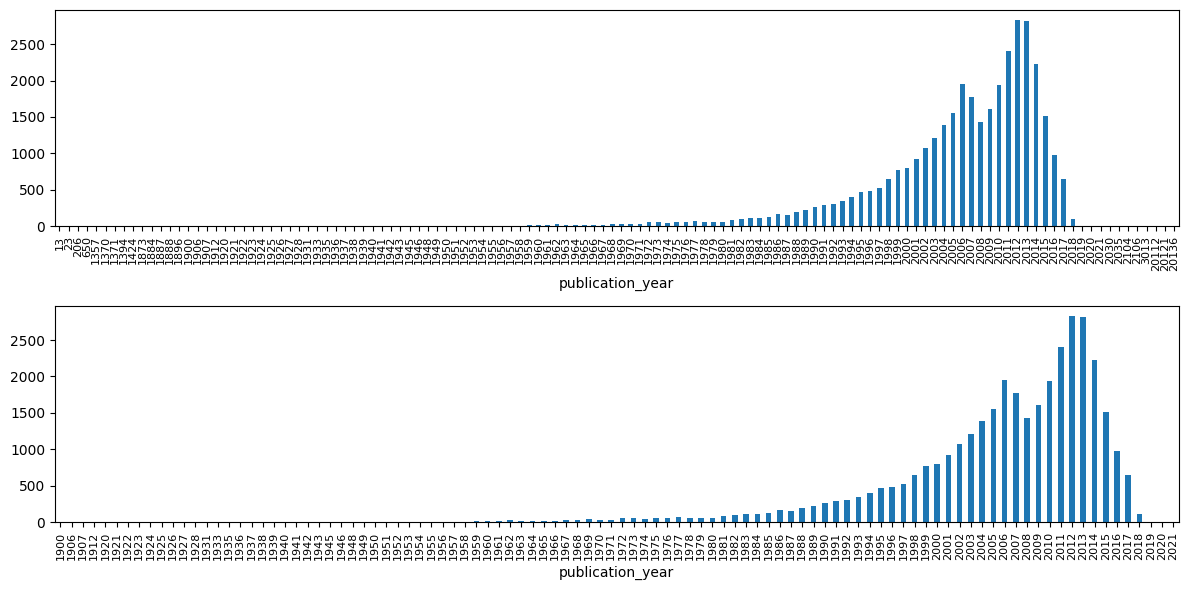

In [12]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [13]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [14]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [15]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


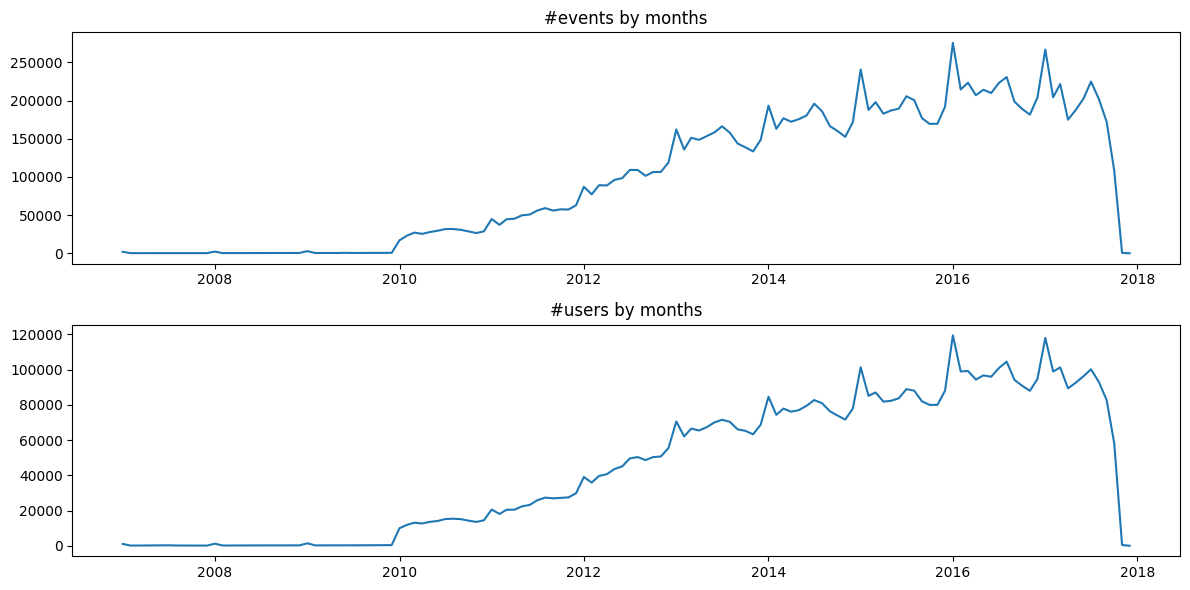

In [16]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [16]:
items = books.copy()
events = interactions.copy()

In [17]:
del books
del interactions

In [18]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

# Ваш код здесь

# Сохранение результатов

In [19]:
items.to_parquet("items.par")

In [20]:
events.to_parquet("events.par")